<a href="https://colab.research.google.com/github/mandrews12/health_app/blob/main/CSC310_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

**Overview**

Heart disease is also known as Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year which is about 32% of all deaths globally. CVDs are a group of disorders of the heart and blood vessels and include coronary heart disease, cerebrovascular disease, rheumatic heart disease, and other conditions. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age.

This dataset contains various health indicators and risk factors related to heart disease. Features such as age, gender, blood pressure, cholesterol levels, and exercise patterns have been collected to analyze heart disease risk and contribute to health research. The dataset can be used to examine trends related to heart disease, identify risk factors, and perform various health-related analyses.

---

**Data Details**

* **Age:** Patient's Age in years (Numeric)
* **Sex:** Patient's Gender Male as 1 Female as 0 (Nominal)
* **Chest Pain Type:** Type of chest pain categorized into 1 typical, 2 typical angina, 3 non-anginal pain, 4 asymptomatic (Categorical)
* **Resting BPs:** Level of blood pressure at resting mode in mm/HG (Numerical)
* **Cholesterol:** Serum cholestrol in mg/dl (Numeric)
* **Fasting Blood Sugar:** Blood sugar levels on fasting > 120 mg/dl represents as 1 in case of true and 0 as false
* **Resting ECG:** result of electrocardiogram while at rest are represented in 3 distinct values 0 : Normal 1: Abnormality in ST-T wave 2: Left ventricular hypertrophy
* **Max Heart Rate:** Maximum heart rate achieved (Numeric)
* **Exercise Angimia:** Angina induced by exercise 0 depicting NO 1 depicting Yes (Nominal)
* **Old Peak:** Exercise induced ST-depression in comparison with the state of rest (Numeric)
* **ST Slope:** ST segment measured in terms of slope during peak exercise 0: Normal 1: Upsloping 2: Flat 3: Downsloping

The target and dependent variable
* **Target:** Heart Risk 1 means heart disease 0 means normal

---

**Classification**

The data set is balanced with there being 629 records for people with heart disease (1) and 561 records for poeple without heart disease (0)

---

**Description**

This data set contains 1190 records with 12 columns for each.

All variables are represented as numerical data.

---

**Preprocessing**

Preprocessing of the model was done with there being no null values but there were duplicate rows. The duplicate rows were dropped.

This led to a data set with 918 rows and 12 columns.

---

**Source**

https://www.kaggle.com/datasets/sid321axn/heart-statlog-cleveland-hungary-final

# Body

## Exploritory Analysis

In [1]:
# basic data routines
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(formatter={'float_kind':"{:3.2f}".format})

# models
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# model evaluation routines
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, balanced_accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# visualization
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import shap
import seaborn as sns


In [2]:
heart_disease = pd.read_csv("/content/heart_statlog_cleveland_hungary_final.csv")

In [3]:
heart_disease

age  sex  chest pain type  resting bp s  cholesterol  \
0      40    1                2           140          289   
1      49    0                3           160          180   
2      37    1                2           130          283   
3      48    0                4           138          214   
4      54    1                3           150          195   
...   ...  ...              ...           ...          ...   
1185   45    1                1           110          264   
1186   68    1                4           144          193   
1187   57    1                4           130          131   
1188   57    0                2           130          236   
1189   38    1                3           138          175   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
0                       0            0             172                0   
1                       0            0             156                0   
2                       0            1              98                0   
3                       0            0             108                1   
4                       0            0             122                0   
...                   ...          ...             ...              ...   
1185                    0            0             132                0   
1186                    1            0             141                0   
1187                    0            0             115                1   
1188                    0            2             174                0   
1189                    0            0             173                0   

      oldpeak  ST slope  target  
0         0.0         1       0  
1         1.0         2       1  
2         0.0         1       0  
3         1.5         2       1  
4         0.0         1       0  
...       ...       ...     ...  
1185      1.2         2       1  
1186      3.4         2       1  
1187      1.2         2       1  
1188      0.0         2       1  
1189      0.0         1       0  

[1190 rows x 12 columns]

In [4]:
heart_disease.duplicated().sum()

np.int64(272)

In [5]:
heart_disease.isnull().sum(axis=0)

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [ ]:
heart_disease = heart_disease.drop_duplicates()

In [6]:
heart_disease.dtypes

age                      int64
sex                      int64
chest pain type          int64
resting bp s             int64
cholesterol              int64
fasting blood sugar      int64
resting ecg              int64
max heart rate           int64
exercise angina          int64
oldpeak                float64
ST slope                 int64
target                   int64
dtype: object

In [ ]:
heart_disease.describe()

age         sex  chest pain type  resting bp s  cholesterol  \
count  918.000000  918.000000       918.000000    918.000000   918.000000   
mean    53.510893    0.789760         3.251634    132.396514   198.799564   
std      9.432617    0.407701         0.931031     18.514154   109.384145   
min     28.000000    0.000000         1.000000      0.000000     0.000000   
25%     47.000000    1.000000         3.000000    120.000000   173.250000   
50%     54.000000    1.000000         4.000000    130.000000   223.000000   
75%     60.000000    1.000000         4.000000    140.000000   267.000000   
max     77.000000    1.000000         4.000000    200.000000   603.000000   

       fasting blood sugar  resting ecg  max heart rate  exercise angina  \
count           918.000000   918.000000      918.000000       918.000000   
mean              0.233115     0.603486      136.809368         0.404139   
std               0.423046     0.805968       25.460334         0.490992   
min               0.000000     0.000000       60.000000         0.000000   
25%               0.000000     0.000000      120.000000         0.000000   
50%               0.000000     0.000000      138.000000         0.000000   
75%               0.000000     1.000000      156.000000         1.000000   
max               1.000000     2.000000      202.000000         1.000000   

          oldpeak    ST slope      target  
count  918.000000  918.000000  918.000000  
mean     0.887364    1.636166    0.553377  
std      1.066570    0.609341    0.497414  
min     -2.600000    0.000000    0.000000  
25%      0.000000    1.000000    0.000000  
50%      0.600000    2.000000    1.000000  
75%      1.500000    2.000000    1.000000  
max      6.200000    3.000000    1.000000

In [ ]:
heart_disease['target'].value_counts()

target
1    508
0    410
Name: count, dtype: int64

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'chest pain type'}>],
       [<Axes: title={'center': 'resting bp s'}>,
        <Axes: title={'center': 'cholesterol'}>,
        <Axes: title={'center': 'fasting blood sugar'}>],
       [<Axes: title={'center': 'resting ecg'}>,
        <Axes: title={'center': 'max heart rate'}>,
        <Axes: title={'center': 'exercise angina'}>],
       [<Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'ST slope'}>,
        <Axes: title={'center': 'target'}>]], dtype=object)

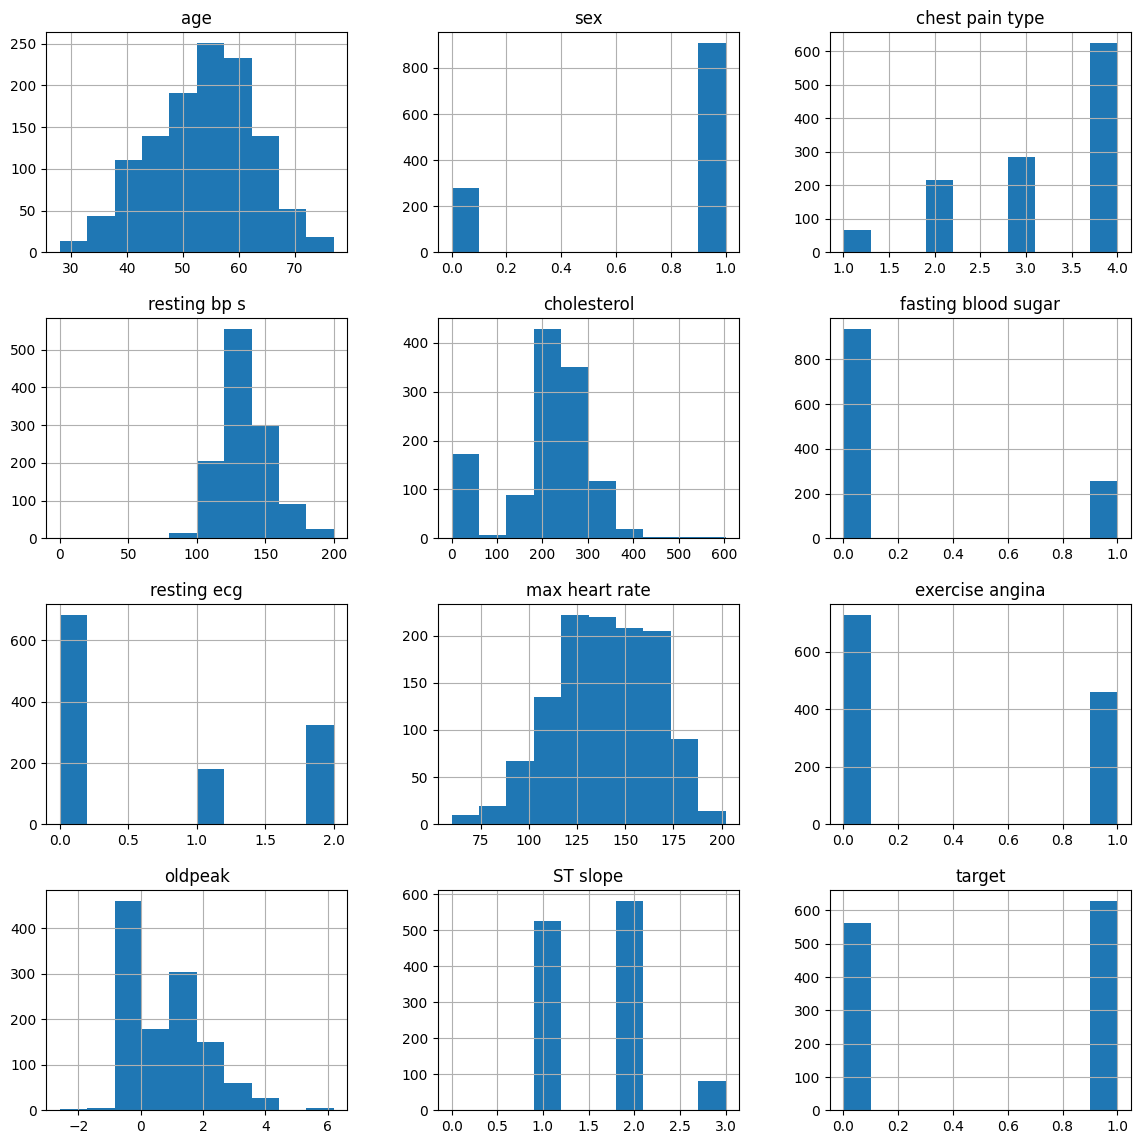

In [7]:
heart_disease.hist(figsize=(14,14))

In [8]:
heart_disease.skew()

age                   -0.192111
sex                   -1.244149
chest pain type       -0.885643
resting bp s           0.293462
cholesterol           -0.781646
fasting blood sugar    1.400482
resting ecg            0.624628
max heart rate        -0.233098
exercise angina        0.462880
oldpeak                1.094006
ST slope               0.405089
target                -0.114617
dtype: float64

Age, Sex, Chest Pain Type, Resting BPs, Cholesterol, Fasting Blood Sugar, Resting ECG, Max HR, Exercise Angina, and Old Peak are unimodel as they all have one peak. ST Slope and Target are multimodel as they all have more than one peak.

Age, Sex, Chest Pain Type, Cholesterol, Max HR and Target are all right skewed while Resting BPs, Fasting Blood Sugar, Resting ECG, Exercise Angina, Old Peak, and ST Slope are left skewed.

Already you can see potential for bias with there being uneven distribution of age and sex.

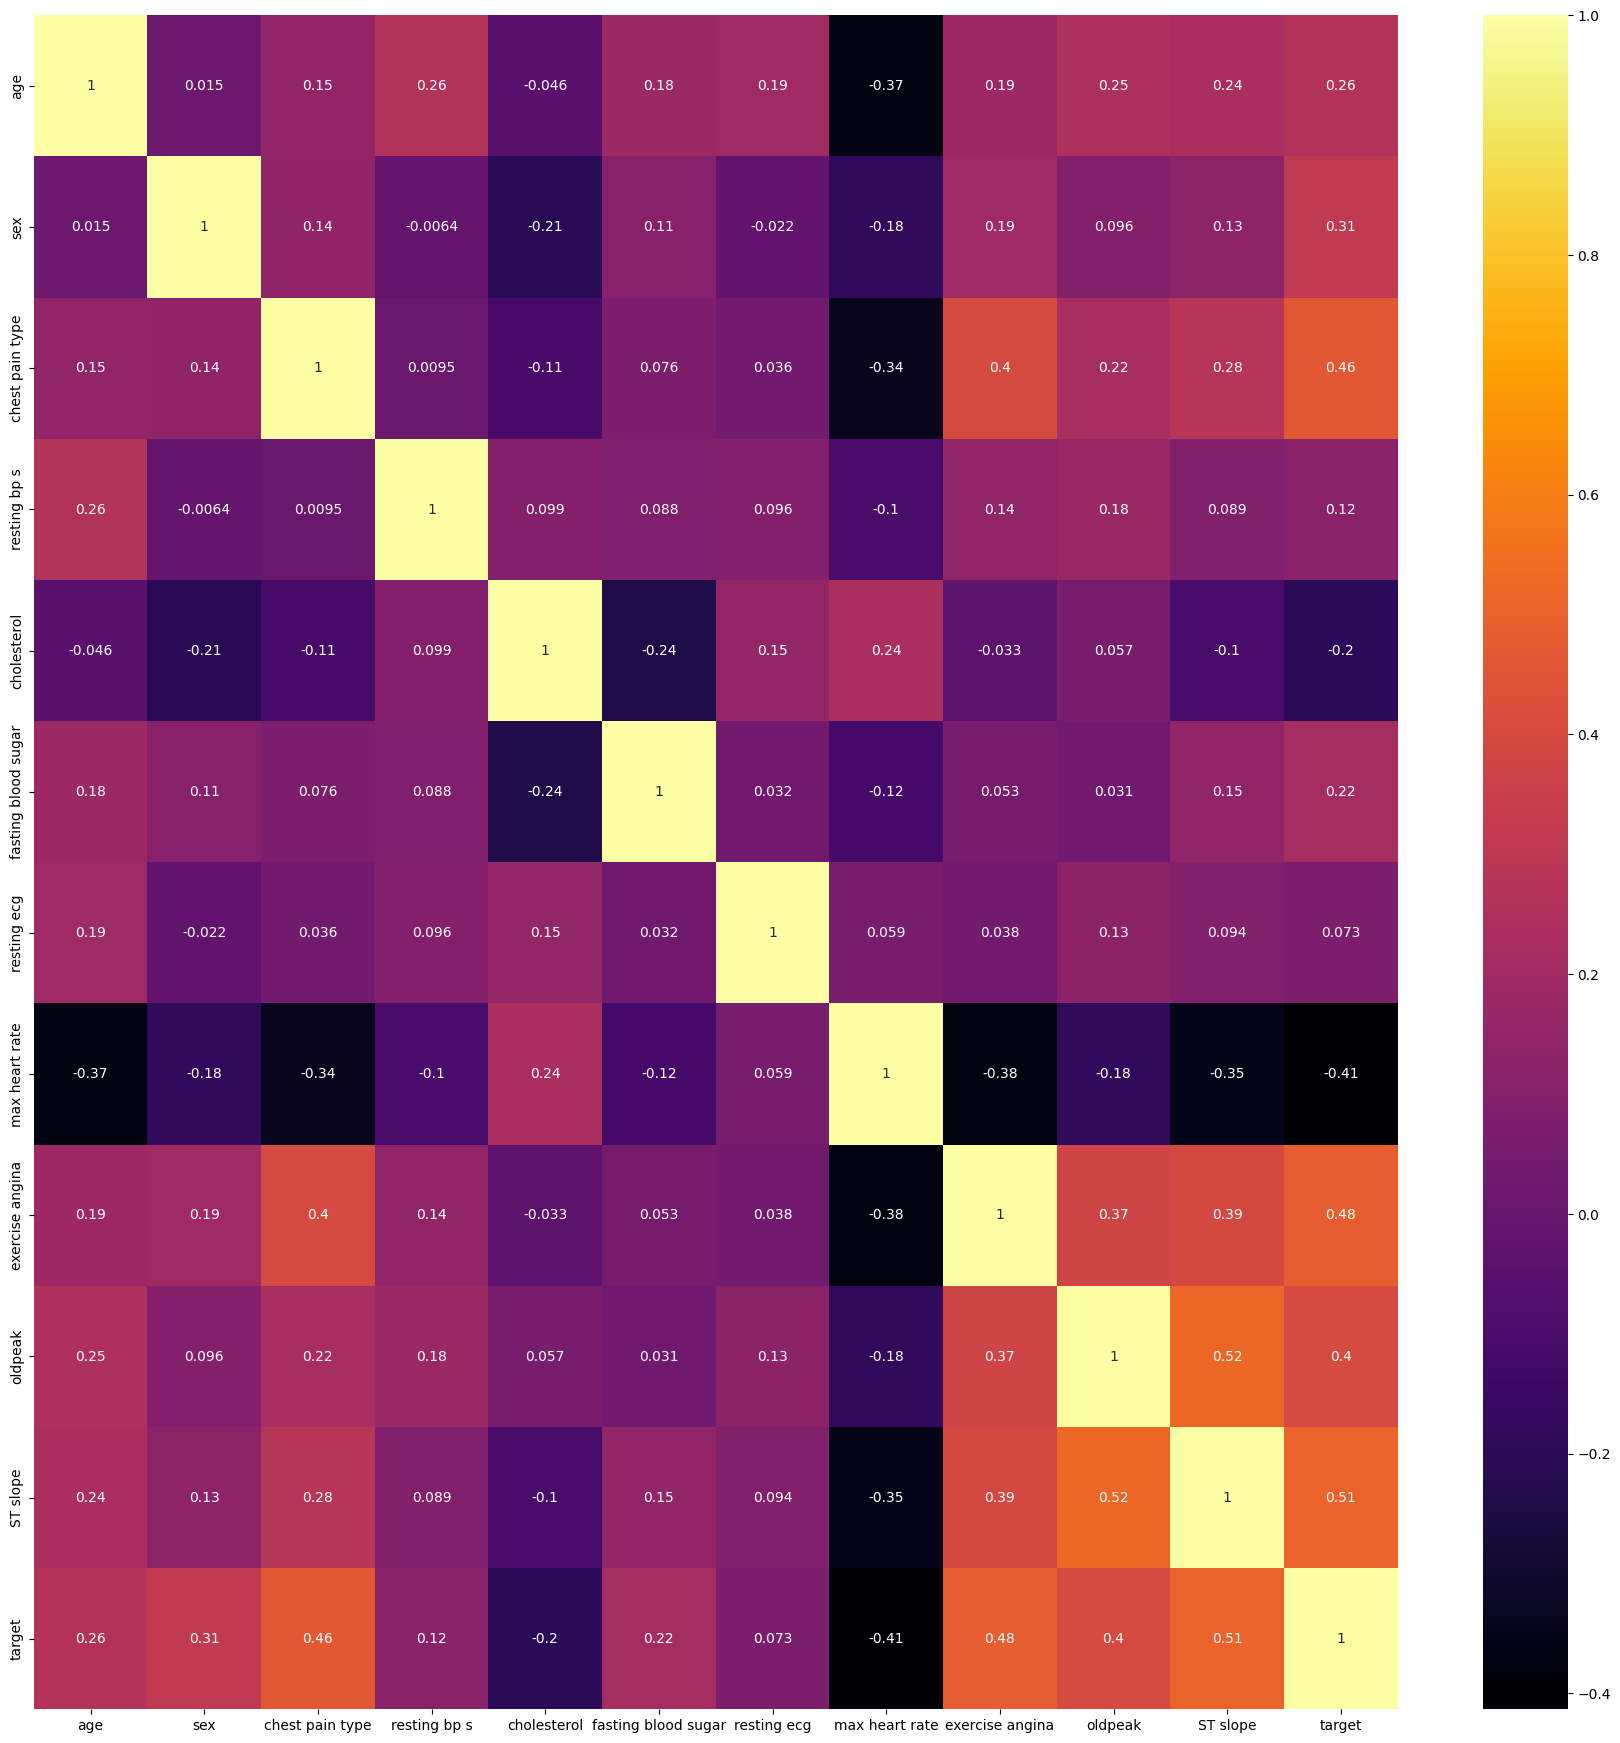

In [ ]:
plt.figure(figsize=(22,22))
sns.heatmap(heart_disease.corr(), annot=True, cmap='inferno');

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


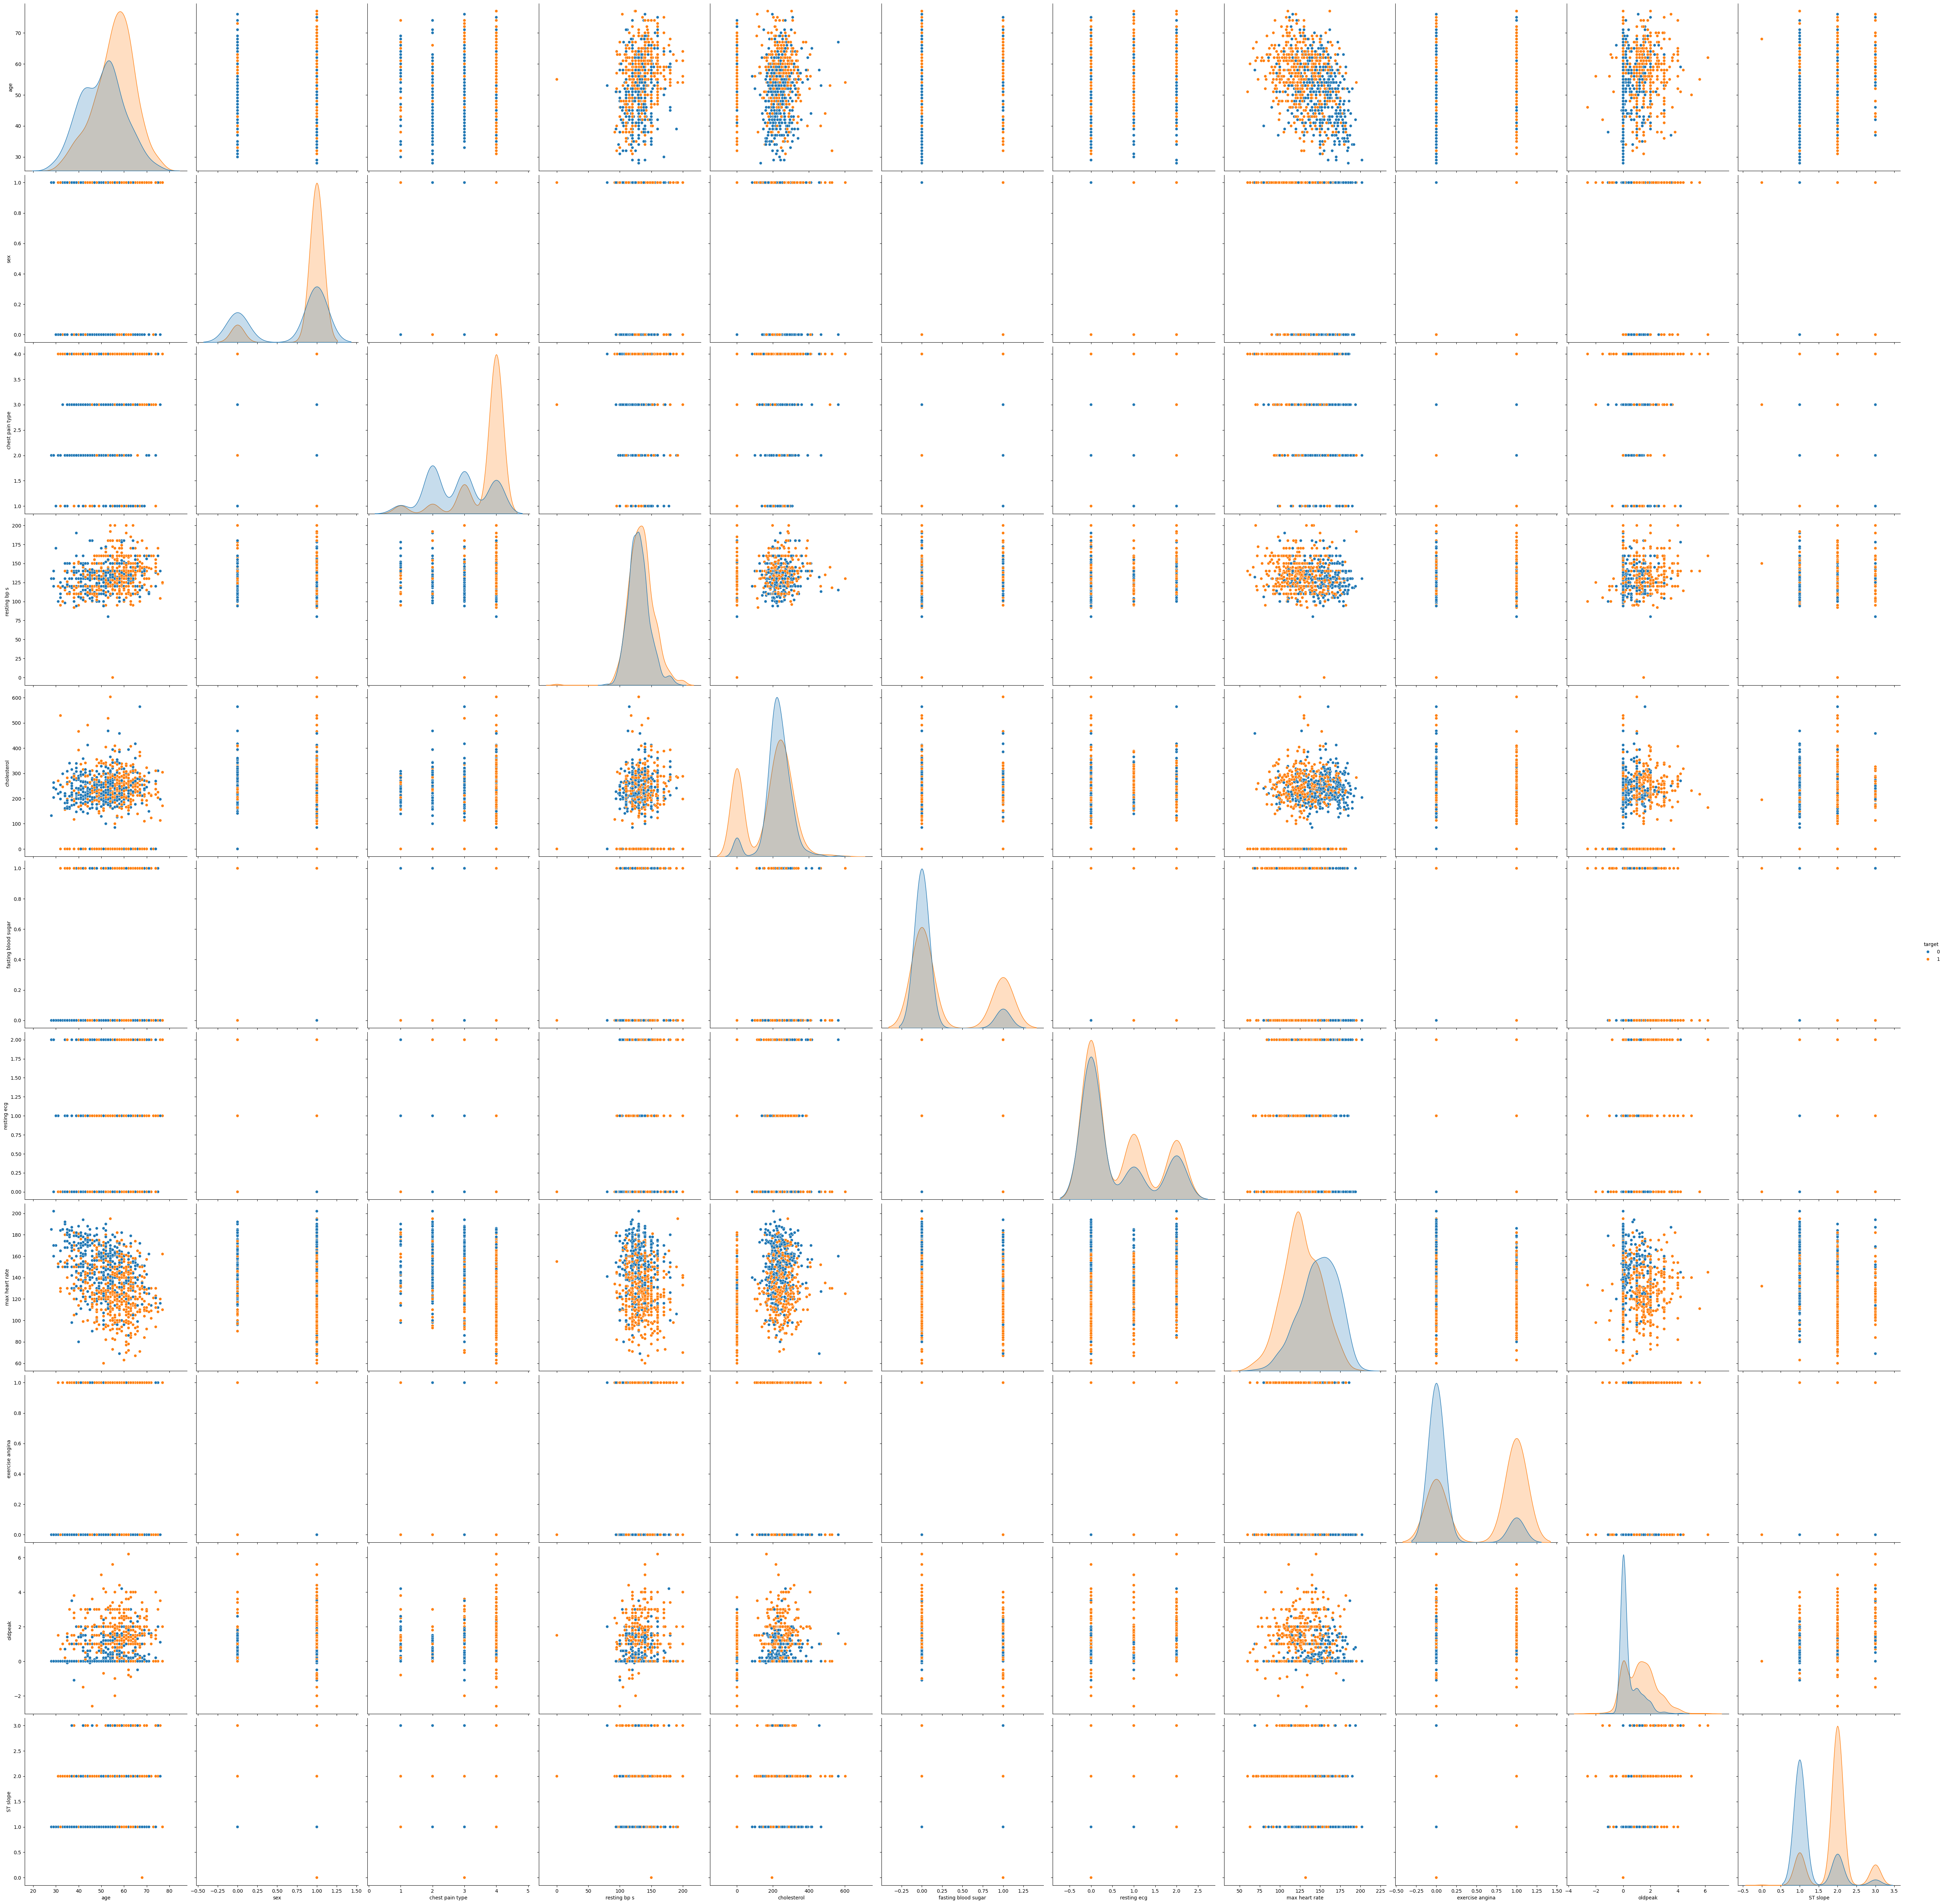

In [ ]:
sns.pairplot(heart_disease,hue='target',size=5)

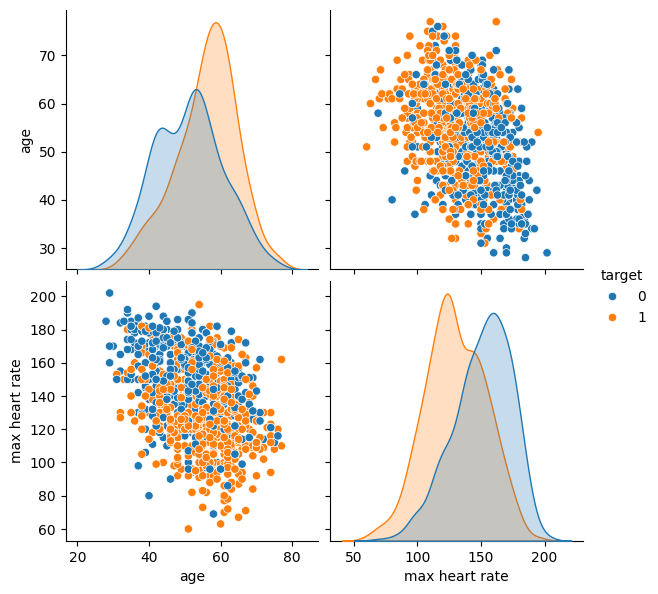

In [ ]:
sns.pairplot(heart_disease,hue='target',height=3,vars =["age", "max heart rate"])

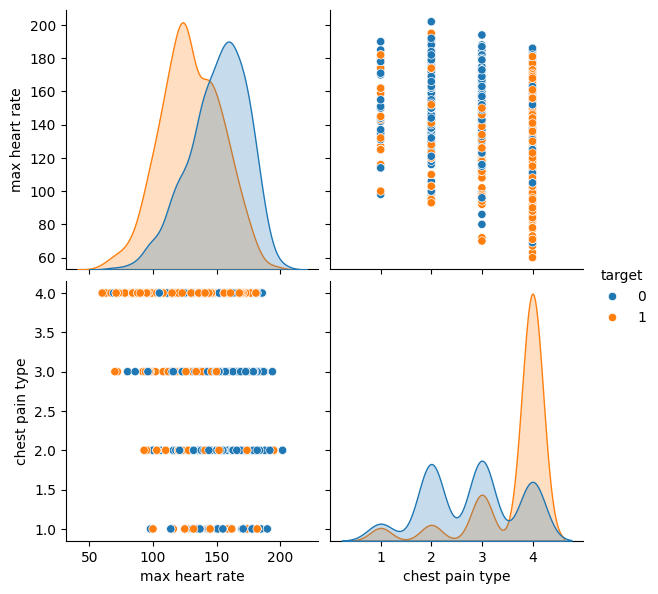

In [ ]:
sns.pairplot(heart_disease,hue='target',height=3,vars =["max heart rate", "chest pain type"])

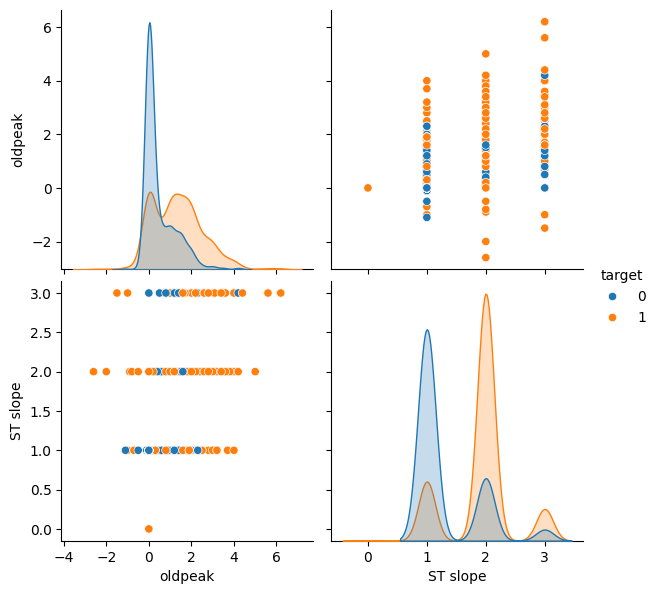

In [11]:
sns.pairplot(heart_disease,hue='target',height=3,vars =["oldpeak", "ST slope"])

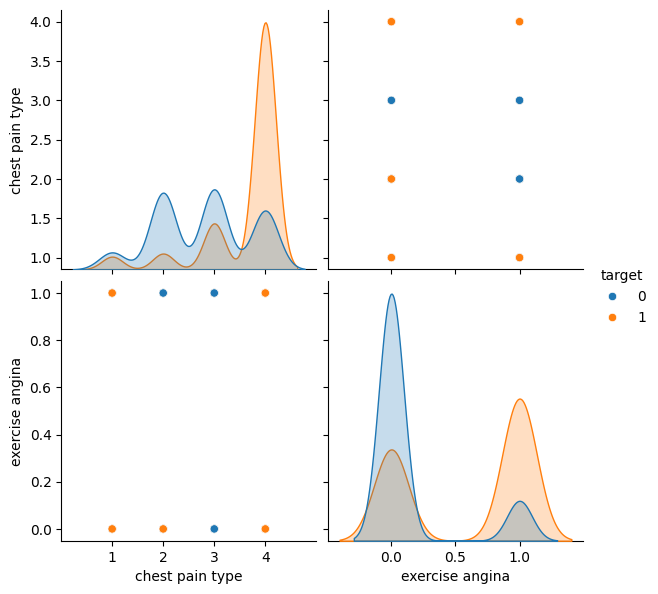

In [12]:
sns.pairplot(heart_disease,hue='target',height=3,vars =["chest pain type", "exercise angina"])

The Scatter Matrix and Heatmap shows the relationship between the variables:

* A greater age correlates to a lower maximum heart rate and a higher blood pressure.

* People with a lower maximum heart rate are more prone to heart disease as unregular heart rythms during exercise are common signs of heart disease.

* People with chest pain type 4 are more at risk of heart diease as chest pain is a common indicator of heart disease.

* People with a lower ST slope are more prone to heart disease.

* Peple who experience exercise angimia are more prone to heart disease as this is a common sign of having the disease.




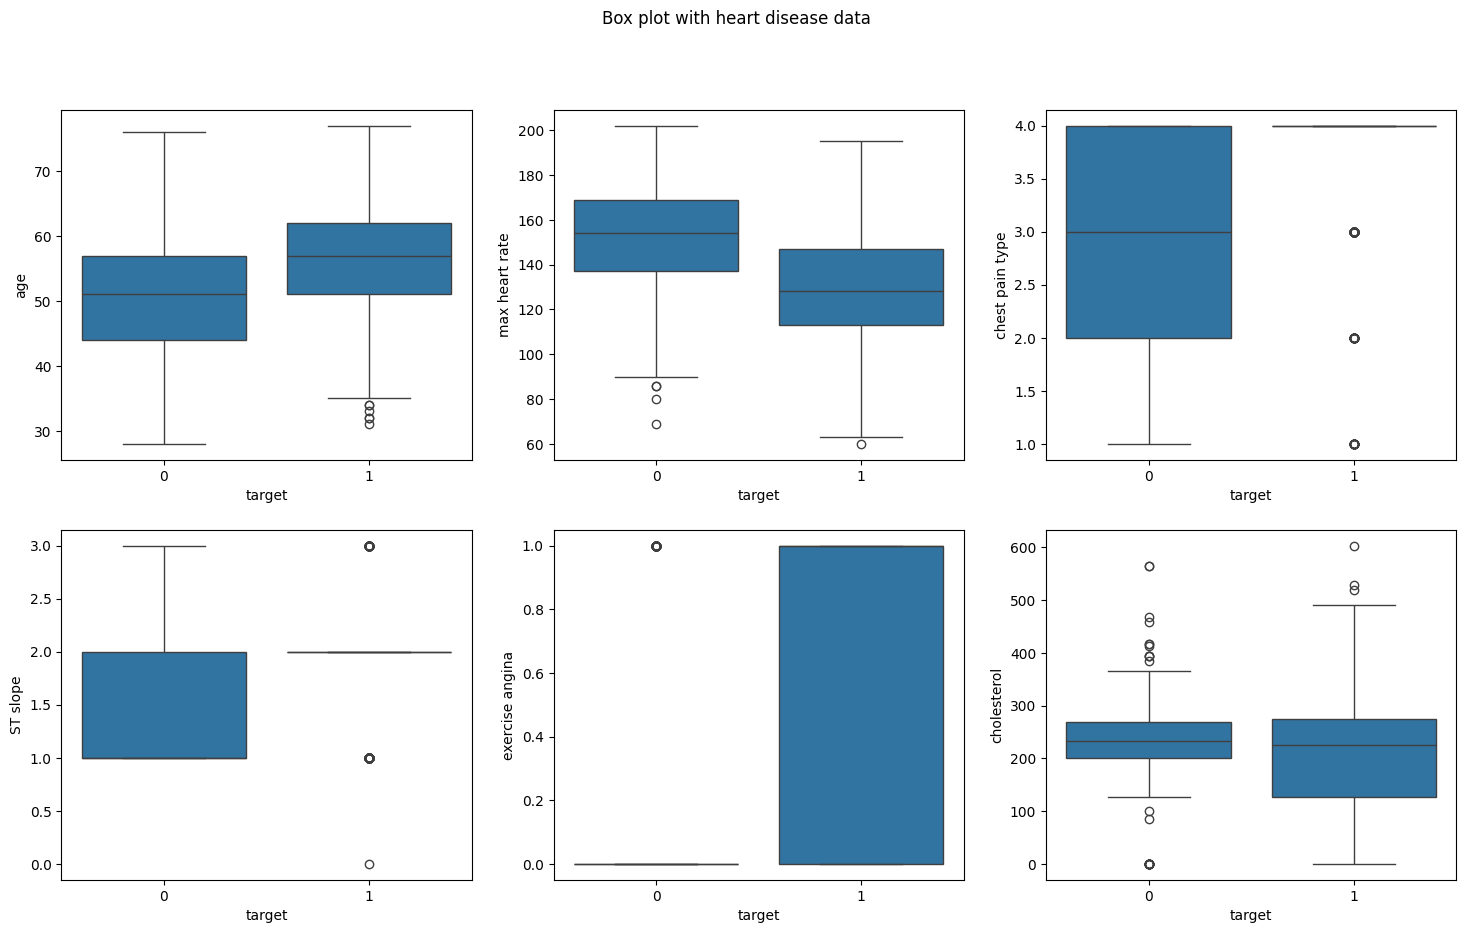

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Box plot with heart disease data')

sns.boxplot(ax=axes[0, 0], data=heart_disease, x='target', y='age')
sns.boxplot(ax=axes[0, 1], data=heart_disease, x='target', y='max heart rate')
sns.boxplot(ax=axes[0, 2], data=heart_disease, x='target', y='chest pain type')
sns.boxplot(ax=axes[1, 0], data=heart_disease, x='target', y='ST slope')
sns.boxplot(ax=axes[1, 1], data=heart_disease, x='target', y='exercise angina')
sns.boxplot(ax=axes[1, 2], data=heart_disease, x='target', y='cholesterol');

The box plots support the insights and correlations found from the scatter plot and heat map.

* People with heart disease have a higher median age as well as a lower medianheart rate

* People with heart diease also have chest pain type 4 with a few outliers while those without heart diease have a wider range of pain types

* People with heart disease have a small range fr=or ST Slope that being 2 with a few outliers

* People without heart diease generally dont experience exercise angina while thse that have heart disease so experience a wide range of it

* For cholesterol, people with heart disease have a wider range of levels with a higher max and lower min

**Hypothesis**

Based on my exploritory analysis, it seems heart disease risk does not have one main determining factor but rather there are multiple factors that contribute to an individual having heart deisease or not. I hypothesis that the main contributers to an individual having heart diesease are having a lower max heart rate, type 4 chest pain, a ST slope of 2 and the presense of exercise angimia.

## Predictive Analysis

In [ ]:
# compute 95% confidence intervals for classification and regression
def classification_confint(acc, n):
    '''
    Compute the 95% confidence interval for a classification problem.
      acc -- classification accuracy
      n   -- number of observations used to compute the accuracy
    Returns a tuple (lb,ub)
    '''
    import math
    interval = 1.96*math.sqrt(acc*(1-acc)/n)
    lb = max(0, acc - interval)
    ub = min(1.0, acc + interval)
    return (lb,ub)

In [ ]:
features = heart_disease.drop('target', axis=1)
target = heart_disease['target']

In [ ]:
# features_train - Training features used to fit(train) the model
# target_train - Training target labels used to fit(train) the model
# features_test - Testing features used to test the model
# target_test - True target labels used to compare againest the model predicted labels

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, shuffle=True, random_state=42)

### SVM Model

In [ ]:
# SVM model
model = SVC(max_iter=10000)

# grid search
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(features_train, target_train)
print("Grid Search: best parameters: {}".format(grid.best_params_))

# accuracy of best model with confidence interval
best_model_SVM = grid.best_estimator_

pred_train_SVM = best_model_SVM.predict(features_train)
pred_test_SVM = best_model_SVM.predict(features_test)

acc_train = accuracy_score(target_train, pred_train_SVM)
acc_test = accuracy_score(target_test, pred_test_SVM)

print("Training Accuracy: {:3.2f}".format(acc_train))
print("Testing Accuracy: {:3.2f}".format(acc_test))
lb,ub = classification_confint(acc_test,features_train.shape[0])
print("Accuracy: {:3.2f} ({:3.2f},{:3.2f})".format(acc_test,lb,ub))

# build the confusion matrix
labels = ['0', '1']
cm = confusion_matrix(target_test, pred_test_SVM, labels=labels)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
print("Confusion Matrix:\n{}".format(cm_df))

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning:

Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning:

Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning:

Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning:

Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning:

Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMa

Grid Search: best parameters: {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
Training Accuracy: 0.89
Testing Accuracy: 0.87
Accuracy: 0.87 (0.84,0.89)
Confusion Matrix:
   0  1
0  0  0
1  0  0


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning:

Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning:

Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



### KNN

In [ ]:
# KNN
model = KNeighborsClassifier()

# grid search
param_grid = {'n_neighbors': list(range(1,26))}
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(features_train, target_train)
print("Grid Search: best parameters: {}".format(grid.best_params_))

# accuracy of best model with confidence interval
best_model_KNN = grid.best_estimator_

pred_train_KNN = best_model_KNN.predict(features_train)
pred_test_KNN = best_model_KNN.predict(features_test)

acc_train = accuracy_score(target_train, pred_train_KNN)
acc_test = accuracy_score(target_test, pred_test_KNN)

print("Training Accuracy: {:3.2f}".format(acc_train))
print("Testing Accuracy: {:3.2f}".format(acc_test))
lb,ub = classification_confint(acc_test,features_train.shape[0])
print("Accuracy: {:3.2f} ({:3.2f},{:3.2f})".format(acc_test,lb,ub))

# build the confusion matrix
labels = ['0', '1']
cm = confusion_matrix(target_test, pred_test_KNN, labels=labels)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
print("Confusion Matrix:\n{}".format(cm_df))

Grid Search: best parameters: {'n_neighbors': 1}
Training Accuracy: 1.00
Testing Accuracy: 0.77
Accuracy: 0.77 (0.74,0.80)
Confusion Matrix:
   0  1
0  0  0
1  0  0


### ANN/MLP

In [ ]:
# neural network
model = MLPClassifier(max_iter=10000, random_state=1)

# grid search
# We set up a grid search over the architecture and activation functions.
# In the architecture search we limit ourselves to node values that are multiples
# of the number of independent variables in the training data.  Also, we
# limit ourselves to a maximum of two hidden layers.
param_grid = {
    # search over different architectures
    'hidden_layer_sizes':
      [
      (10,), (20,),            # single layer MLP
      (10,10), (20,10)         # two layer MLP
      ],
    # search different activation functions
    'activation' : ['logistic', 'tanh', 'relu']
}

# use 3-fold cross-validation otherwse grid search takes too long
grid = GridSearchCV(model, param_grid, cv=3)
grid.fit(features_train, target_train)
print("Grid Search: best parameters: {}".format(grid.best_params_))

# accuracy of best model with confidence interval
best_model_ANN = grid.best_estimator_

pred_train_ANN = best_model_ANN.predict(features_train)
pred_test_ANN = best_model_ANN.predict(features_test)

acc_train = accuracy_score(target_train, pred_train_ANN)
acc_test = accuracy_score(target_test, pred_test_ANN)

print("Training Accuracy: {:3.2f}".format(acc_train))
print("Testing Accuracy: {:3.2f}".format(acc_test))
lb,ub = classification_confint(acc_test,features_train.shape[0])
print("Accuracy: {:3.2f} ({:3.2f},{:3.2f})".format(acc_test,lb,ub))

# build the confusion matrix
labels = ['0','1']
cm = confusion_matrix(target_test, pred_test_ANN, labels=labels)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
print("Confusion Matrix:\n{}".format(cm_df))

Grid Search: best parameters: {'activation': 'logistic', 'hidden_layer_sizes': (20,)}
Training Accuracy: 0.84
Testing Accuracy: 0.84
Accuracy: 0.84 (0.82,0.86)
Confusion Matrix:
   0  1
0  0  0
1  0  0


### Decision Tree

In [ ]:
# decision trees
model = DecisionTreeClassifier(random_state=1)

# grid search
param_grid = {'max_depth': list(range(1,21)), 'criterion': ['entropy','gini'] }
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(features_train, target_train)
print("Grid Search: best parameters: {}".format(grid.best_params_))

# accuracy of best model with confidence interval
best_model_DT = grid.best_estimator_

pred_train_DT = best_model_DT.predict(features_train)
pred_test_DT = best_model_DT.predict(features_test)

acc_train = accuracy_score(target_train, pred_train_DT)
acc_test = accuracy_score(target_test, pred_test_DT)

print("Training Accuracy: {:3.2f}".format(acc_train))
print("Testing Accuracy: {:3.2f}".format(acc_test))
lb,ub = classification_confint(acc_test,features_train.shape[0])
print("Accuracy: {:3.2f} ({:3.2f},{:3.2f})".format(acc_test,lb,ub))

# build the confusion matrix
labels = ['0','1']
cm = confusion_matrix(target_test, pred_test_DT, labels=labels)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
print("Confusion Matrix:\n{}".format(cm_df))

Grid Search: best parameters: {'criterion': 'entropy', 'max_depth': 12}
Training Accuracy: 1.00
Testing Accuracy: 0.88
Accuracy: 0.88 (0.86,0.90)
Confusion Matrix:
   0  1
0  0  0
1  0  0


In [ ]:
def model_metrics(y_true, y_predict):
  # proportion of all classifications that were correct, whether positive or negative
  accuracy= accuracy_score(y_true, y_predict)

  # proportion of all the model's positive classifications that are actually positive
  precision=precision_score(y_true, y_predict, average='micro')

  # proportion of all actual positives that were classified correctly as positives
  recall=recall_score(y_true, y_predict, average='micro')

  # harmonic mean of the precision and recall
  f1=f1_score(y_true, y_predict, average='micro')

  # the average of recall obtained on each class
  balanced_accuracy=balanced_accuracy_score(y_true, y_predict)
  return [accuracy, precision, recall, f1, balanced_accuracy]

In [ ]:
DT_train_metrics = model_metrics(target_train, pred_train_DT)
DT_test_metrics = model_metrics(target_test, pred_test_DT)

SVM_train_metrics = model_metrics(target_train, pred_train_SVM)
SVM_test_metrics = model_metrics(target_test, pred_test_SVM)

df_dt = pd.DataFrame([DT_train_metrics, DT_test_metrics], columns=['Accuracy', 'Precision', 'Recall', 'F1', 'Balanced Accuracy'], index=['Train', 'Test'])
df_ann = pd.DataFrame([SVM_train_metrics, SVM_test_metrics], columns=['Accuracy', 'Precision', 'Recall', 'F1', 'Balanced Accuracy'], index=['Train', 'Test'])

all_metrics_values ={"Decision Tree": df_dt, "SVM": df_ann}

all_metrics_values

{'Decision Tree':        Accuracy  Precision    Recall        F1  Balanced Accuracy
 Train  0.997899   0.997899  0.997899  0.997899           0.997992
 Test   0.882353   0.882353  0.882353  0.882353           0.885425,
 'SVM':        Accuracy  Precision    Recall        F1  Balanced Accuracy
 Train  0.888655   0.888655  0.888655  0.888655           0.886860
 Test   0.865546   0.865546  0.865546  0.865546           0.860741}

In [ ]:
def plot_bar_results(dataset_type, all_metrics_values):
    fig = go.Figure()
    for model_name, metrics_df in all_metrics_values.items():
        metrics_names = list(metrics_df.columns)
        values = metrics_df.loc[dataset_type].to_numpy()
        fig.add_trace(go.Bar(y=values, x=metrics_names, name=model_name))
    fig.update_layout(barmode="group", xaxis_tickangle=-45, title_text=dataset_type+" Dataset")
    fig.show()

In [ ]:
plot_bar_results("Train", all_metrics_values)

In [ ]:
plot_bar_results("Test", all_metrics_values)

Overall my two best models statistically was the Decision Tree with a 88% accuracy and the SVM model with a 87% accuracy. The Decision tree has a CI of 86% - 90% about 88% of the time while the SVM model has a 84% to 89% accuracy 87% of the time. Because there is overlap in the confidence intervals, there is not alot of statistical difference in the performance of the two models. While both models perform pretty equally when testing against training data, the DT has lower score across the board when testing against new data compared to the training data. Because the DT has such a high training accuracy and a lower testing accuracy, there might be some overfitting of the model but it still performs the best for both training and testing data. Because of this my best model would be the Decision Tree.

## Model Interpretation

[Text(0.4351498983739837, 0.9615384615384616, 'ST slope <= 1.5\nentropy = 0.998\nsamples = 952\nvalue = [454, 498]\nclass = Heart Disease'),
 Text(0.1839430894308943, 0.8846153846153846, 'chest pain type <= 3.5\nentropy = 0.738\nsamples = 428\nvalue = [339, 89]\nclass = No Heart Disease'),
 Text(0.309546493902439, 0.9230769230769231, 'True  '),
 Text(0.07520325203252033, 0.8076923076923077, 'age <= 56.5\nentropy = 0.393\nsamples = 284\nvalue = [262, 22]\nclass = No Heart Disease'),
 Text(0.032520325203252036, 0.7307692307692307, 'cholesterol <= 153.0\nentropy = 0.189\nsamples = 208\nvalue = [202, 6]\nclass = No Heart Disease'),
 Text(0.016260162601626018, 0.6538461538461539, 'oldpeak <= 0.45\nentropy = 0.991\nsamples = 9\nvalue = [5, 4]\nclass = No Heart Disease'),
 Text(0.008130081300813009, 0.5769230769230769, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = No Heart Disease'),
 Text(0.024390243902439025, 0.5769230769230769, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = He

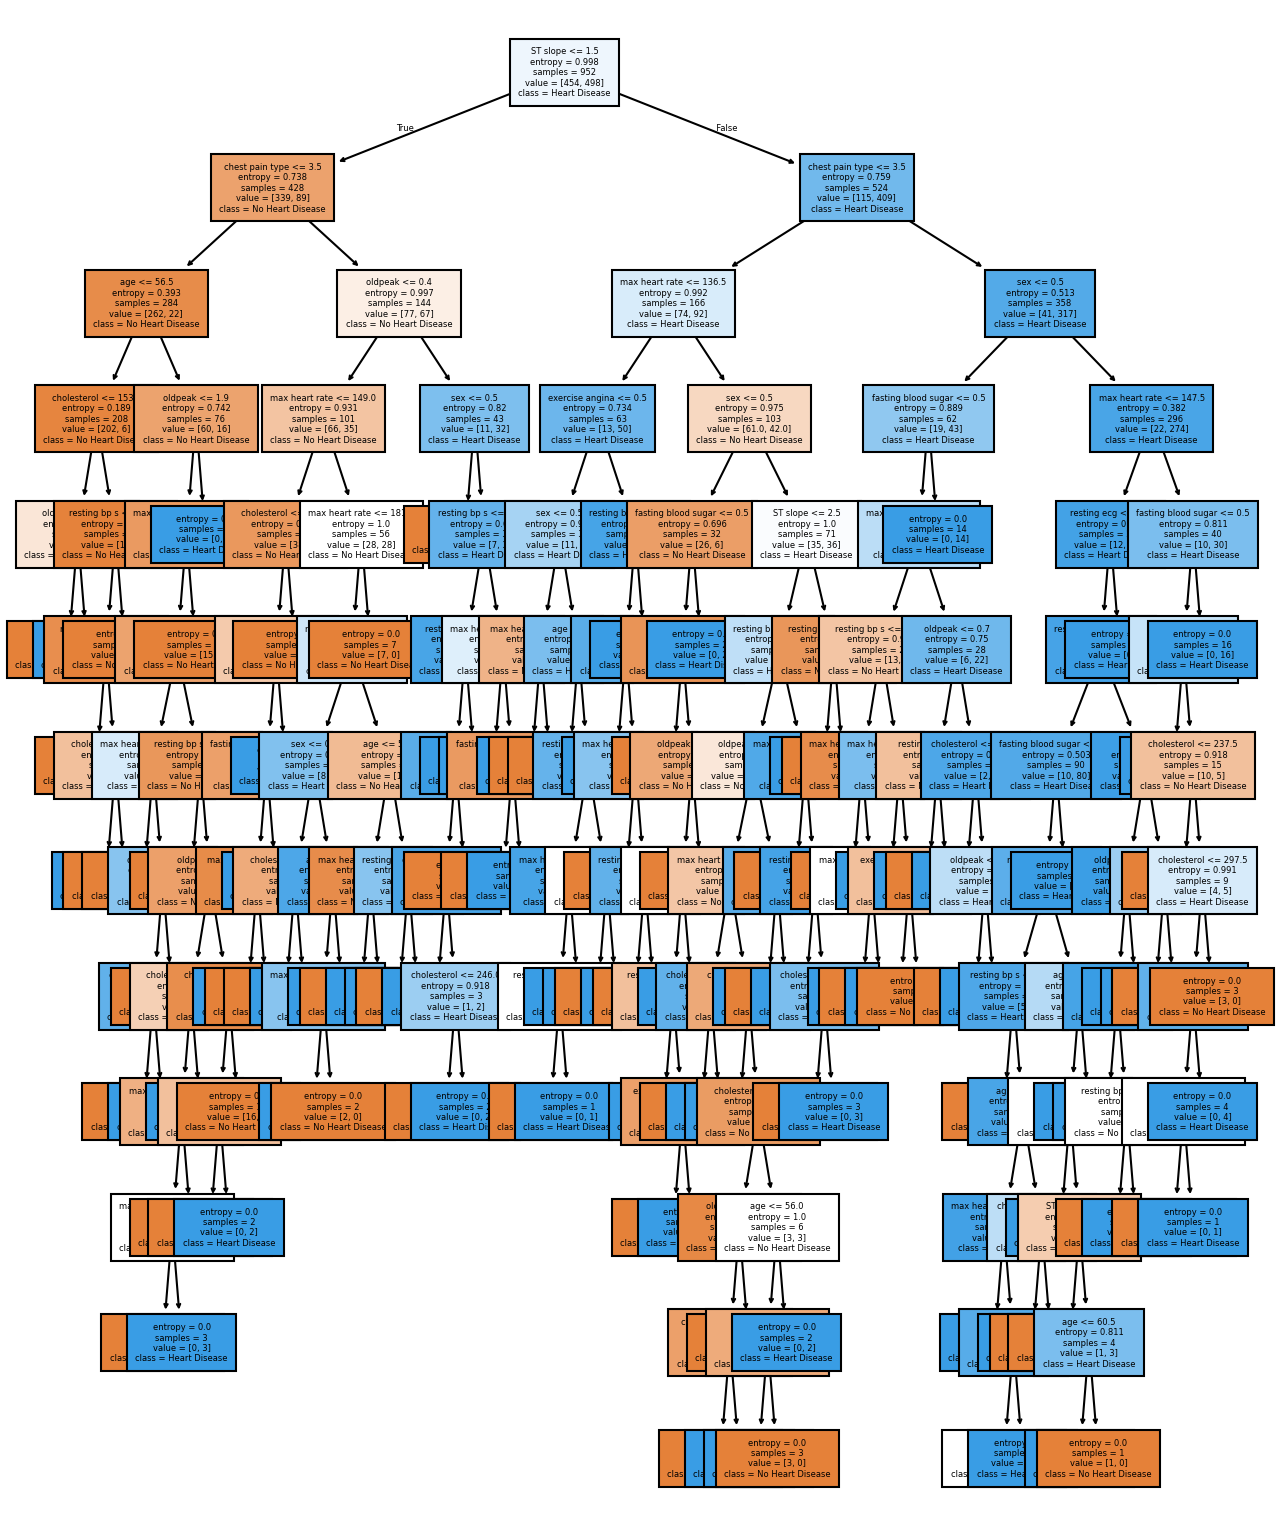

In [ ]:
# Visualize the decision tree model
fig, axes = plt.subplots(1, 1, figsize=(10,13), dpi=150)
plot_tree(best_model_DT, fontsize=4, filled=True,
               max_depth=None,
               feature_names= features.columns,
               class_names= ['No Heart Disease', 'Heart Disease'],
               ax=axes)

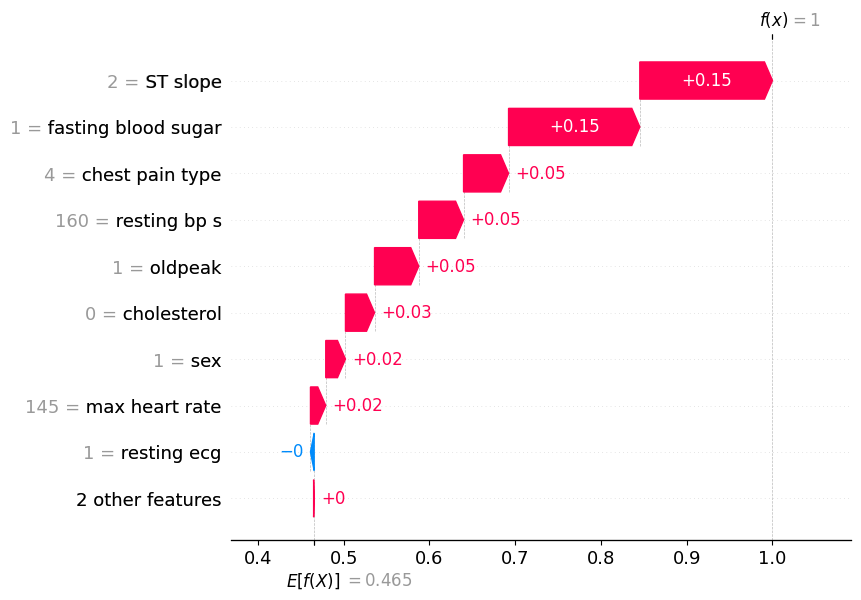

In [ ]:
explainer = shap.Explainer(best_model_DT, features_test)
shap_values = explainer(features_test)
shap.plots.waterfall(shap_values[0, :,1])

# sources used for model interpretation
# https://towardsdatascience.com/using-shap-values-to-explain-how-your-machine-learning-model-works-732b3f40e137/


During my exploritory analysis, I had said that heart disease risk does not have one main determining factor but rather there are multiple factors that contribute to an individual having heart deisease or not. I hypothesised that the main contributers to an individual having heart diesease are having a lower max heart rate, type 4 chest pain, a ST slope of 2 and the presense of exercise angimia. Upon reviewing my models and which variables are the main influencers, it seems my predictive analysis agrees with my exploratory analysis. ST Slope, type 4 chest pain, and a lower max heart rate are all contributing factors of heart disease. However in my exploritory analysis I did not see that having fasting blood sugar, a higher resting bp s and old peak would have such an impact. Those are factors that my models showed me.

### Bias

In [ ]:
heart_disease['sex'].value_counts()

sex
1    725
0    193
Name: count, dtype: int64

In [ ]:
# Here we are trying to train the model using male data and validate and test using female data and analyze the performance of the model.


# Let's say we want to split the data in 80:10:10 for train:valid:test dataset, but here we'll filter the data for male =1 only!
train_size=0.8

# Here we are only considering male data (['sex'] == 1)
X = heart_disease[heart_disease['sex'] == 1].drop(['target', 'sex'], axis=1)
y = heart_disease[heart_disease['sex'] == 1]['target']

# In the first step we will split the male data in training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8)

# we'll not further split the male data as we want to filter female data and use that for validation and test.

# Here we are filtering female data
X1 = heart_disease[heart_disease['sex'] == 0].drop(['target', 'sex'], axis=1)
y1 = heart_disease[heart_disease['sex'] == 0]['target']

# In the first step we will split the female data in training and remaining dataset (we did this to follow above split ration)
X1_train, X1_rem, y1_train, y1_rem = train_test_split(X1,y1, train_size=0.8)

# Now since we want the valid and test size to be equal (10% each of overall data).
# we have to define valid_size=0.5 (that is 50% of remaining data)

# test_size = 0.5
X1_val, X1_test, y1_val, y1_test = train_test_split(X1_rem,y1_rem, test_size=0.5)


# Create a logistic regression model and train it on the training data (male data)
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Make predictions on the validation data (female data)
y1_val_pred = lr.predict(X1_val)

# Calculate the accuracy of the model on the validation data
val_accuracy = accuracy_score(y1_val, y1_val_pred)
print('Validation Accuracy:', val_accuracy)

# Test the final model on the testing data (female data)
y1_test_pred = lr.predict(X1_test)

# Calculate the accuracy of the model on the testing data
test_accuracy = accuracy_score(y1_test, y1_test_pred)
print('Test Accuracy:', test_accuracy)

# Print classification report
print('Classification Report:')
print(classification_report(y1_test, y1_test_pred))

Validation Accuracy: 0.7142857142857143
Test Accuracy: 0.8620689655172413
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.86      0.90        22
           1       0.67      0.86      0.75         7

    accuracy                           0.86        29
   macro avg       0.81      0.86      0.83        29
weighted avg       0.88      0.86      0.87        29



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



While the target value is balanced between representation for people with heart disease and those without and there is little bias there, there is bias when it comes to gender as there is a huge discrepancy in the number of male vs female representation but when trained on male data and then tested on female data, the model actually performed well. The only slight cause for concern would be that for precision, the model only correctly identified 60% of the individuals that had heart disease which could lead to the model giving false positive predictions. I hypothesis that the model is still pretty accurate despite not being trained on female data is that gender is not a big indicator of heart disease so in the case of this minority, the models perform well.

# Conclusion

In conclusion, from the statistics and insights gained from the data analysis it seems that the driving idicators of heart disease include having a flat slope during peak exercise, having blood sugar levels when fasting above 120 mg/dl, having asymptomatic chest pain, having higher blood pressure when at rest, having exercise induced ST-depression, and having a lower heart rate. While this model performs reasonably well across all models, has a balanced target class, there is defenitly room for improvment when it comes to bias from minority groups be that with age or sex. As a dataset that is used for predicting health risk factors, it is crucial that it is able to accuratly predict the outcome across all groups.